In [1]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_list = sorted(glob.glob("/woldlab/castor/home/hamrhein/proj/rothenberg/2015082400/tophat/*/accepted_hits.bam"))

Build the DataFrame object from the BAM file index
--------------------------------------------------
Don't forget to strip out the "*" entry and to change the dtype to int

pysam samtools commands and ipython notebook interaction appears to be broken, so we use "!" shell commands as input.

In [3]:
spike_dict = {}
for f in file_list:
    lib = f.split("/")[-2]
    idx_stats = !samtools idxstats {f}
    spike_dict[lib] = dict([[t for t in i.split("\t")][0:3:2] for i in idx_stats])
    del spike_dict[lib]["*"]

In [4]:
df = pd.DataFrame(spike_dict, dtype=np.int)

Define the spike-ins
--------------------
Also break them into their subgroups

In [7]:
spikeins = ['ERCC-00130', 'ERCC-00004', 'ERCC-00136', 'ERCC-00108', 'ERCC-00116', 'ERCC-00092', 'ERCC-00095', 'ERCC-00131',
            'ERCC-00062', 'ERCC-00019', 'ERCC-00144', 'ERCC-00170', 'ERCC-00154', 'ERCC-00085', 'ERCC-00028', 'ERCC-00033',
            'ERCC-00134', 'ERCC-00147', 'ERCC-00097', 'ERCC-00156', 'ERCC-00123', 'ERCC-00017', 'ERCC-00083', 'ERCC-00096',
            'ERCC-00171', 'ERCC-00009', 'ERCC-00042', 'ERCC-00060', 'ERCC-00035', 'ERCC-00025', 'ERCC-00051', 'ERCC-00053',
            'ERCC-00148', 'ERCC-00126', 'ERCC-00034', 'ERCC-00150', 'ERCC-00067', 'ERCC-00031', 'ERCC-00109', 'ERCC-00073',
            'ERCC-00158', 'ERCC-00104', 'ERCC-00142', 'ERCC-00138', 'ERCC-00117', 'ERCC-00075', 'ERCC-00074', 'ERCC-00113',
            'ERCC-00145', 'ERCC-00111', 'ERCC-00076', 'ERCC-00044', 'ERCC-00162', 'ERCC-00071', 'ERCC-00084', 'ERCC-00099',
            'ERCC-00054', 'ERCC-00157', 'ERCC-00143', 'ERCC-00039', 'ERCC-00058', 'ERCC-00120', 'ERCC-00040', 'ERCC-00164',
            'ERCC-00024', 'ERCC-00016', 'ERCC-00012', 'ERCC-00098', 'ERCC-00057', 'ERCC-00002', 'ERCC-00046', 'ERCC-00003',
            'ERCC-00043', 'ERCC-00022', 'ERCC-00112', 'ERCC-00165', 'ERCC-00079', 'ERCC-00078', 'ERCC-00163', 'ERCC-00059',
            'ERCC-00160', 'ERCC-00014', 'ERCC-00077', 'ERCC-00069', 'ERCC-00137', 'ERCC-00013', 'ERCC-00168', 'ERCC-00041',
            'ERCC-00081', 'ERCC-00086', 'ERCC-00061', 'ERCC-00048']
n = 4
sglen = len(spikeins) // n
print(len(spikeins), len(spikeins)/4)
subgroups = [spikeins[i:i + sglen] for i in range(0, len(spikeins), sglen)]
print(subgroups)

92 23.0
[['ERCC-00130', 'ERCC-00004', 'ERCC-00136', 'ERCC-00108', 'ERCC-00116', 'ERCC-00092', 'ERCC-00095', 'ERCC-00131', 'ERCC-00062', 'ERCC-00019', 'ERCC-00144', 'ERCC-00170', 'ERCC-00154', 'ERCC-00085', 'ERCC-00028', 'ERCC-00033', 'ERCC-00134', 'ERCC-00147', 'ERCC-00097', 'ERCC-00156', 'ERCC-00123', 'ERCC-00017', 'ERCC-00083'], ['ERCC-00096', 'ERCC-00171', 'ERCC-00009', 'ERCC-00042', 'ERCC-00060', 'ERCC-00035', 'ERCC-00025', 'ERCC-00051', 'ERCC-00053', 'ERCC-00148', 'ERCC-00126', 'ERCC-00034', 'ERCC-00150', 'ERCC-00067', 'ERCC-00031', 'ERCC-00109', 'ERCC-00073', 'ERCC-00158', 'ERCC-00104', 'ERCC-00142', 'ERCC-00138', 'ERCC-00117', 'ERCC-00075'], ['ERCC-00074', 'ERCC-00113', 'ERCC-00145', 'ERCC-00111', 'ERCC-00076', 'ERCC-00044', 'ERCC-00162', 'ERCC-00071', 'ERCC-00084', 'ERCC-00099', 'ERCC-00054', 'ERCC-00157', 'ERCC-00143', 'ERCC-00039', 'ERCC-00058', 'ERCC-00120', 'ERCC-00040', 'ERCC-00164', 'ERCC-00024', 'ERCC-00016', 'ERCC-00012', 'ERCC-00098', 'ERCC-00057'], ['ERCC-00002', 'ERC

No [added] spike-ins here, but shape is there.
----------------------------------------------

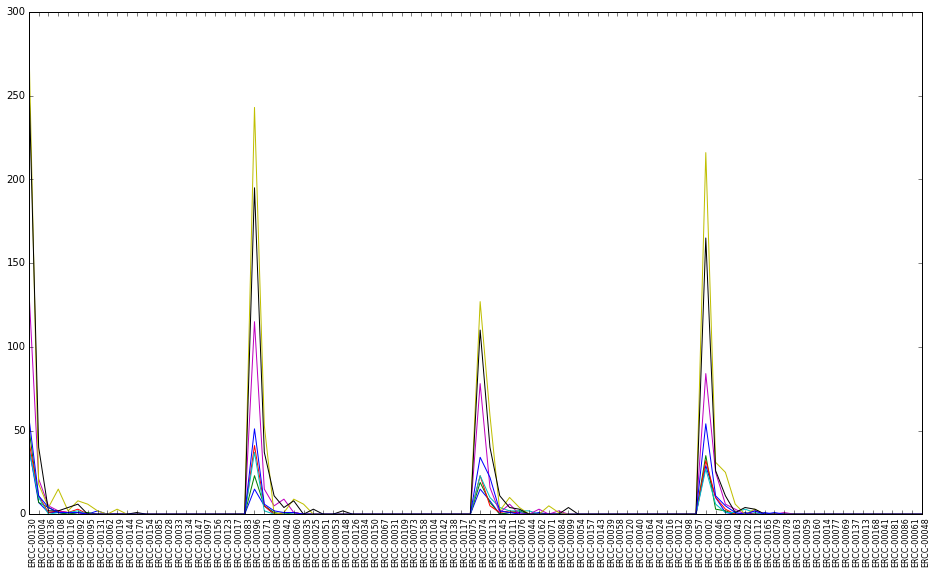

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(16.00, 9.0), dpi=100)
ax = fig.add_subplot(111)
ax.set_xticks(range(len(spikeins)))
ax.set_xticklabels(spikeins, rotation=90, size=8, ha="left")
p = ax.plot(df.loc[spikeins])